In [1]:
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [3]:
A = pd.read_json("../../Data/Stress/150VU/MI1/10W-150VU-stress-a-report4.json")
B = pd.read_json("../../Data/Stress/150VU/MI1/10W-150VU-stress-b-report4.json")
C = pd.read_json("../../Data/Stress/150VU/MI1/10W-150VU-stress-c-report2.json")

In [4]:
 def get_time_series(dataframe: pd.DataFrame) -> pd.Series:
    number_of_rows = len(dataframe.index)

    return pd.Series(
        name='time',
        data=[element * 10 for element in range(number_of_rows)]
    )

In [9]:
 def get_latency(time: pd.Series, dataframe: pd.DataFrame) -> pd.DataFrame:
    latency = pd.concat([time, dataframe['latency']], axis=1)
    latency = latency.set_index('time')

    for key, value in latency['latency'][0].items():
        latency[key] = latency['latency'].apply(lambda object: object[key])

    latency = latency.drop(columns=['latency', 'p99'])

    return latency[['max', 'p95', 'median', 'min']]

In [10]:
time = get_time_series(B)
latency_b = get_latency(time, B)

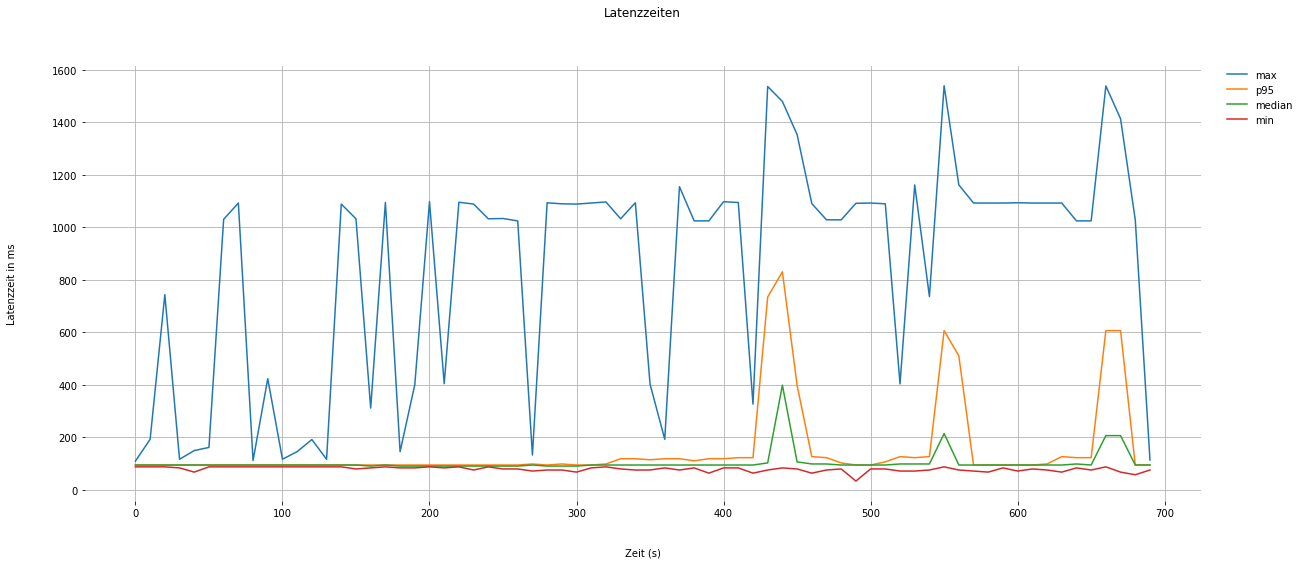

In [12]:
# Plot settings.
figure, row = plt.subplots(
    nrows=1,
    ncols=1,
    sharey='row',
    sharex='col',
    figsize=(20,8)
)
plt.grid()

# Label settings
row.set_title('Latenzzeiten', y=1.1)
row.set_ylabel('Latenzzeit in ms', labelpad=35)
row.set_xlabel('Zeit (s)', labelpad=30)

#Plot
latency_b_plot = sb.lineplot(
    ax=row,
    dashes=False,
    legend=False,
    data=latency_b
)

# Grid settings.
sb.despine(
    left=True,
    bottom=True
)

# Legend settings.
latency_b_plot.legend(
    loc=2,
    frameon=False,
    framealpha=1.0,
    borderaxespad=0.0,
    bbox_to_anchor=(1.02, 1),
    labels=['max', 'p95', 'median', 'min'],
)